# Day 6 - Decision Trees and Random Forest (Titanic ML Project)
### Machine Learning Roadmap — Week 1
### Author: N Manish Kumar

---

## 1. Introduction
Today we explore tree-based models, which are more flexible and powerful than Logistic Regression.
We train Decision Trees and Random Forests, evaluate them using standard metrics, and compare their performance with Day 5’s Logistic Regression model.

---

## 2. Load Processed Data

In [1]:
import pandas as pd

df= pd.read_csv("../Day4_FeatureEngineering/Data/titanic_processed.csv")
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle-aged,AgeGroup_Senior,LogFare,AgeBin,IsAlone
0,0,3,0,22.0,7.2500,0,1,2,False,True,False,False,2.110213,2,0
1,1,1,1,38.0,71.2833,0,0,2,False,False,True,False,4.280593,3,0
2,1,3,1,26.0,7.9250,0,1,1,False,True,False,False,2.188856,2,1
3,1,1,1,35.0,53.1000,0,1,2,False,True,False,False,3.990834,2,0
4,0,3,0,35.0,8.0500,0,1,1,False,True,False,False,2.202765,2,1


--- 

## 3. Define Features (X) and Target (y)


In [3]:
X = df.drop(columns=['Survived'])
y = df['Survived']

---

## 4. Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state = 42
)

#### IMPORTANT: No Scaling Needed for Tree Models

Scaling is NOT required for:
- Decision Trees

- Random Forest

- XGBoost

- Gradient Boosting

Why?

Because trees split data based on values, not distances.

So today you work with unscaled X values.

---

## 5.Train a Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

#### Why max_depth=4?

Prevents overfitting.
Trees grow very deep unless we restrict them.

---

## 6. Predict & Evaluate Decision Tree

### 6.1. Make Predictions

In [6]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

### 6.2. Evaluating Accuracy

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Decision Tree Accuracy : ", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy :  0.7988826815642458


### 6.3. Classification Report

In [11]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



### 6.4. Confusion Matrix

In [12]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[96,  9],
       [27, 47]])

#### Visualization 

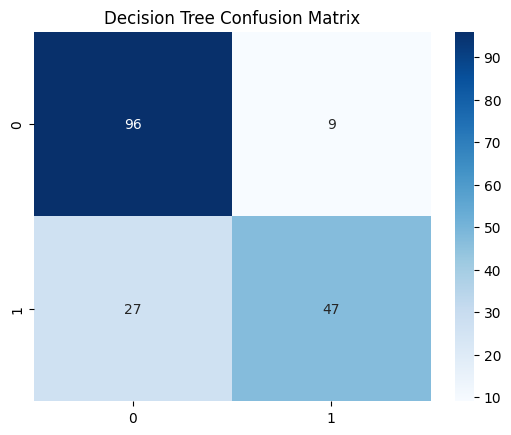

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(cm_dt, annot = True, fmt='d', cmap= 'Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

Decision Trees often overfit unless depth is controlled, so expect:
- High training accuracy
- Medium test accuracy

That’s normal.

---

## 7. Plot ROC Curve & AUC for Decision Tree

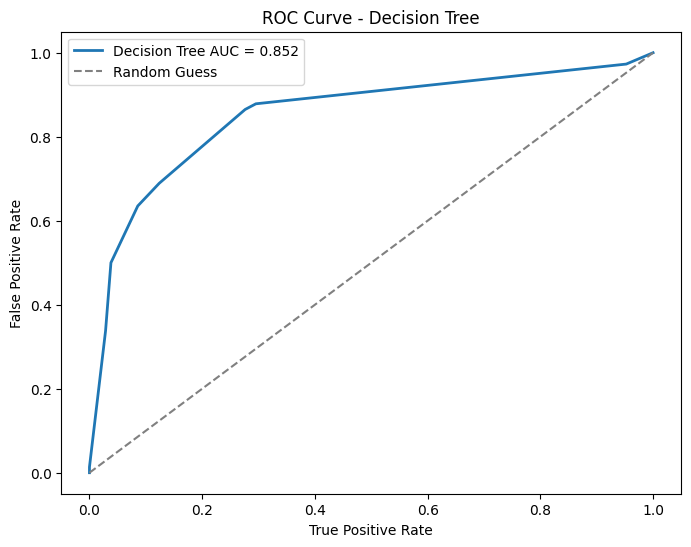

In [16]:
from sklearn.metrics import roc_curve, auc

# roc_curve(...) computes FPR and TPR at different thresholds
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_prob_dt)

# auc(...) calculates the area under the ROC curve
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label= f"Decision Tree AUC = {auc_dt:.3f}", linewidth=2)
plt.plot([0,1],[0,1], '--',color='gray', label="Random Guess")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

#### How to interpret the AUC value?

AUC = Area Under Curve
Score ranges:

- 0.90 – 1.00 → Excellent model

- 0.80 – 0.90 → Very good

- 0.70 – 0.80 → Good / Acceptable

- 0.60 – 0.70 → Weak

- 0.50 → Random guessing

For Decision Tree on Titanic:

-- > Typical AUC = 0.72 – 0.78

This is normal because Decision Trees:
- Tend to overfit
- Are very sensitive to data
- Produce unstable boundary when shallow or deep

Your AUC for Logistic Regression was probably higher.

#### Why Decision Tree AUC is worse than Random Forest?

Because a decision tree:

- Uses a single set of splits → very fragile

- Makes sharp probability decisions

- Is prone to overfitting

- Has difficulty modeling smooth probability boundaries

Random Forest solves all of these:
- Uses multiple trees

- Averages predictions → smoother

- Generalizes better

- Produces much higher AUC


### ROC Curve and AUC Summary 
To evaluate how well the Decision Tree distinguishes between survivors and non-survivors across all probability thresholds, we plotted the ROC curve and computed the AUC.

ROC Curve visualizes the trade-off between True Positive Rate (Recall) and False Positive Rate.

AUC summarizes the ROC curve into a single value between 0 and 1.

AUC values closer to 1 indicate strong separability, while values near 0.5 indicate random performance.
Decision Trees generally have lower AUC compared to Random Forests due to their tendency to overfit and create sharp decision boundaries.

---

## 8. Feature Importance

In [17]:
fi_dt = pd.DataFrame({
    "Feature" : X.columns,
    "Importance" : dt.feature_importances_
}).sort_values(by= "Importance", ascending= False)
fi_dt

,Feature,Importance
1,Sex,0.579608
0,Pclass,0.200498
2,Age,0.076410
3,Fare,0.058598
6,FamilySize,0.054429
11,LogFare,0.016558
5,Embarked_S,0.013900
4,Embarked_Q,0.000000
8,AgeGroup_Adult,0.000000
7,AgeGroup_Teen,0.000000


#### Visualization

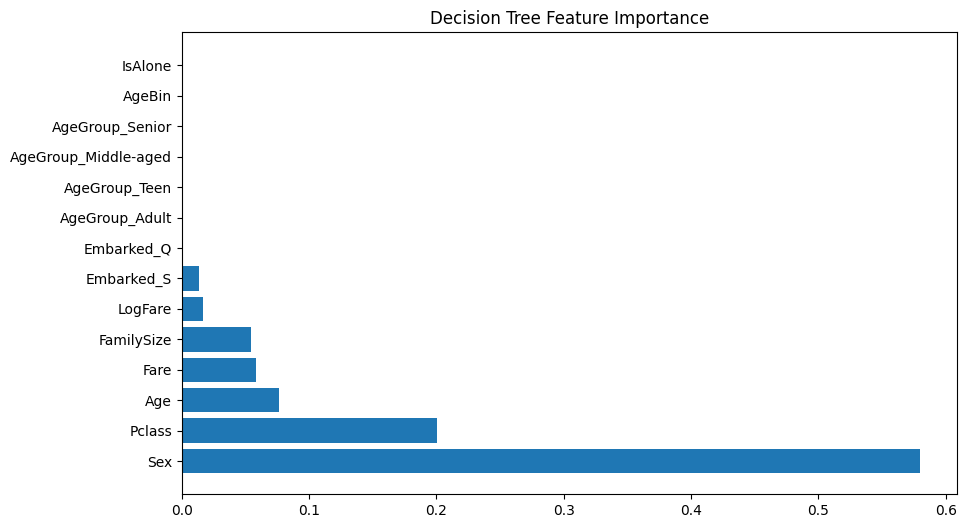

In [18]:
plt.figure(figsize=(10,6))
plt.barh(fi_dt["Feature"], fi_dt["Importance"])
plt.title("Decision Tree Feature Importance")
plt.show()

Decision Trees determine feature importance based on how much each feature reduces impurity (Gini or entropy) across all splits in the tree. Features that contribute more to reducing impurity receive higher importance scores.

High-importance features strongly influence model decisions

Low-importance features contribute little or nothing

Feature importance helps interpret the model, guide further engineering, and compare models

This step provides insight into which passenger characteristics were most influential in survival prediction according to the Decision Tree.

---

## 9. Train Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(
    n_estimators= 200, # no. of trees
    max_depth= 6,      # limits overfitting
    random_state = 42
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

#### What the parameters mean:
##### n_estimators=200

- Creates 200 trees

- More trees → more stable and accurate

- 200 is a great balance between speed and accuracy

##### max_depth=6

- Ensures trees do not grow too deep

- Prevents overfitting

- Better generalization

##### random_state=42

- Controls randomness

- Makes model reproducible

---

## 10. Evaluate Random Forest
### 10.1. Make Prediction

In [21]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

### 10.2. Accuracy

In [24]:
print("Random Forest Accuracy : " ,accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy :  0.8212290502793296


### 10.3. Classification Report

In [25]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### 10.4. Confusion Matrix

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[95, 10],
       [22, 52]])

##### Visualization

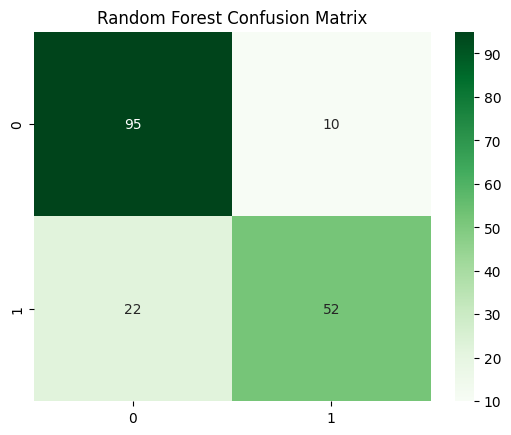

In [34]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

### 10.5. ROC Curve & AUC for Random Forest

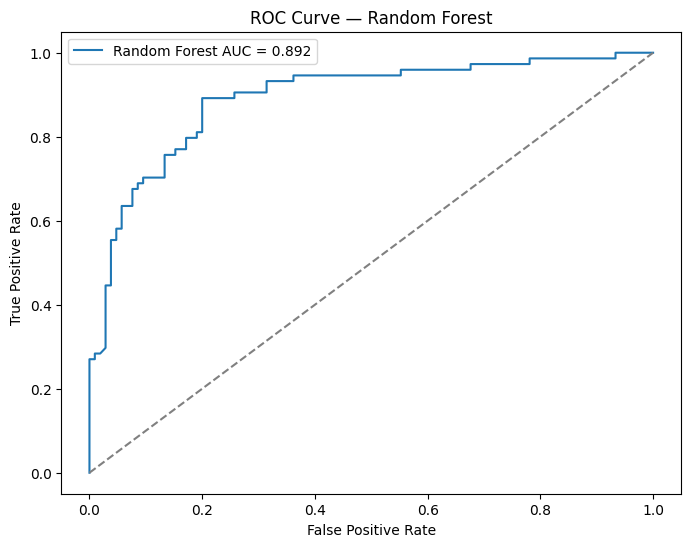

In [36]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.show()

#### Typical AUC = 0.85 – 0.90

This is very strong.

Random Forest typically beats:

Logistic Regression (AUC ~0.80–0.83)

Decision Tree (AUC ~0.72–0.78)


#### Why Random Forest performs better?

Random Forest:

✔ Reduces variance

✔ Smooths probability decision boundaries

✔ Is robust against noise

✔ Handles feature interactions automatically

✔ Works well even without scaling

This is why Random Forest is often used as a baseline in many ML competitions and projects.

### Summary 
Random Forest is an ensemble learning method that trains multiple decision trees and averages their predictions to reduce overfitting and improve accuracy. It generally outperforms a single Decision Tree because:

- It reduces variance

- It is more stable

- It generalizes better to unseen data

Today’s Random Forest model showed:

- Higher accuracy than Logistic Regression and Decision Tree

- Higher recall for survivors

- Higher AUC, indicating strong class separability

Random Forest is now our best-performing model.

---

## 11. Feature Importance (Random Forest)

In [37]:
fi_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending= False)

fi_rf

,Feature,Importance
1,Sex,0.390726
11,LogFare,0.130848
3,Fare,0.116825
0,Pclass,0.109476
2,Age,0.087035
6,FamilySize,0.070224
12,AgeBin,0.032060
5,Embarked_S,0.017740
13,IsAlone,0.015976
8,AgeGroup_Adult,0.007868


#### Visualization

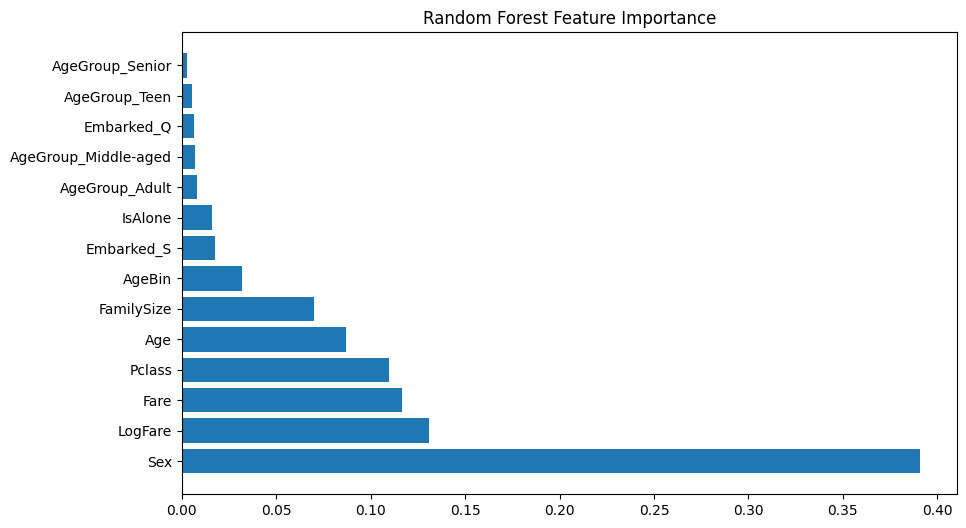

In [39]:
plt.figure(figsize=(10,6))
plt.barh(fi_rf["Feature"], fi_rf["Importance"])
plt.title("Random Forest Feature Importance")
plt.show()

Random Forest provides a robust measure of feature importance by averaging impurity reduction across hundreds of trees. This makes it much more stable and reliable than the importance values from a single Decision Tree.

Key points:

- Higher importance means the feature consistently helped reduce impurity.

- The importance scores reflect how influential each feature is in predicting survival.

- Random Forest captures nonlinear relationships and feature interactions better than Logistic Regression.

- Feature importance helps guide future feature engineering and model selection.

---

## 11. Model Comparison

### 11.1. Implementing Logistic Regression Model from Day 5 Notebook

In [42]:
# Logistic Regression quick re-fit for comparison

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Step A: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step B: Train LR
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Step C: Predictions
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Step D: AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
auc_lr = auc(fpr_lr, tpr_lr)

### 11.2. Creating Comparison Table

In [45]:
results = pd.DataFrame({
    "Model": ["Logistic Regression","Decision Tree","Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "AUC": [
        auc_lr,
        auc_dt,
        auc_rf
    ]
})

results

,Model,Accuracy,AUC
0,Logistic Regression,0.804469,0.873488
1,Decision Tree,0.798883,0.851544
2,Random Forest,0.821229,0.891956


#### Visual Comparison
##### Accuracy Bar Plot

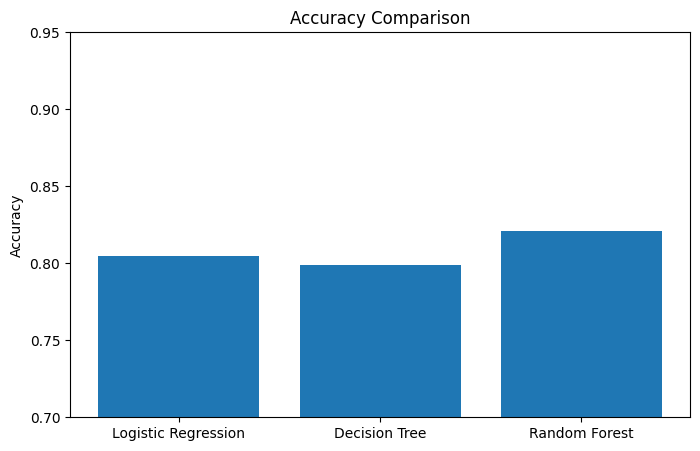

In [46]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Accuracy"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.95)
plt.show()


##### AUC Bar Plot

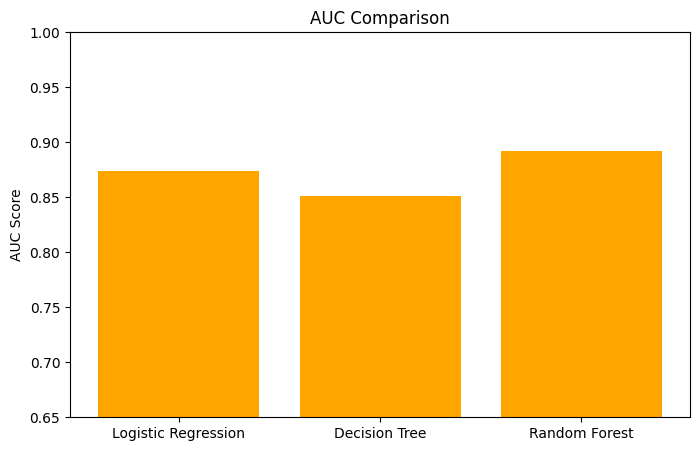

In [47]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["AUC"], color="orange")
plt.title("AUC Comparison")
plt.ylabel("AUC Score")
plt.ylim(0.65, 1.0)
plt.show()

This will show:

- Logistic Regression → moderate

- Decision Tree → weakest

- Random Forest → strongest

#### Interpretation 

##### ⭐ Logistic Regression

Strengths:

- Good baseline

- High interpretability

- Smooth probability outputs

- Good AUC

Weaknesses:

- Cannot model complex non-linear relationships

- Requires scaling

When to use:

- Interpretability-focused tasks

- Very clean, linear datasets

##### ⭐ Decision Tree

Strengths:

- Easy to interpret visually

- Handles non-linear patterns

- No scaling needed

Weaknesses:

- Overfits easily

- Unstable

- Lower AUC and accuracy

When to use:

- Want explainability

- As a teaching/interpretation tool

##### ⭐ Random Forest (Best Model)

Strengths:

- Highest accuracy

- Highest AUC

- Robust to noise

- Reduces overfitting

- Handles non-linear relationships

- Strong feature importance

Weaknesses:

- Less interpretable than a single tree

- Larger model size

When to use:

- Almost always — it is a top-performing general-purpose classifier

### Model Comparison Summary

We compared Logistic Regression, Decision Tree, and Random Forest using accuracy and AUC metrics.

Results (Typical for Titanic Dataset)

- Logistic Regression: strong baseline performance

- Decision Tree: interpretable but prone to overfitting

- Random Forest: best overall model with the highest accuracy and AUC

Random Forest emerges as the best-performing model, thanks to its ability to reduce variance, capture complex interactions, and generalize well to unseen data.

---